In [6]:
#Q1
#We first define the probabilities
P_pass = 0.9  # Probability of passing the class
P_fail = 1 - P_pass  # Probability of failing the class
P_quick_given_pass = 0.6  # Probability of answering quickly given passing
P_quick_given_fail = 0.3  # Probability of answering quickly given failing

#Compute P(answering quickly) using the law of total probability
P_quick = P_quick_given_pass * P_pass + P_quick_given_fail * P_fail
print(f"P(Quick) = {P_quick:.2f}")
#We get P(Quick) equal to 0.57,then we compute P(Pass|Quick) using Bayes' Theorem
P_pass_given_quick = (P_quick_given_pass * P_pass) / P_quick
print(f"P(Pass|Quick) = {P_pass_given_quick:.3f}")
#We get the final result, the probability of students who answer this question quickly will pass the class is 0.947






P(Quick) = 0.57
P(Pass|Quick) = 0.947




#Q2
---

## Step 1: Multinomial Likelihood
The likelihood for a multinomial distribution is given by:

![](Multinomial_Likelihood.png)


---
---
## Step 2: Dirichlet Prior
The Dirichlet prior for the parameters is:
![](Multinomial_Likelihood.png)

---

---
## Step 3: Posterior Distribution

![](Posterior_Derivation1.png)
---
---
## Step 4: Posterior Parameters

The parameters of the posterior Dirichlet distribution are:  
![](Posterior_Parameters.png)

---



In this way, we get the posterior parameters, and the posterior distribution is a Dirichlet distribution.  






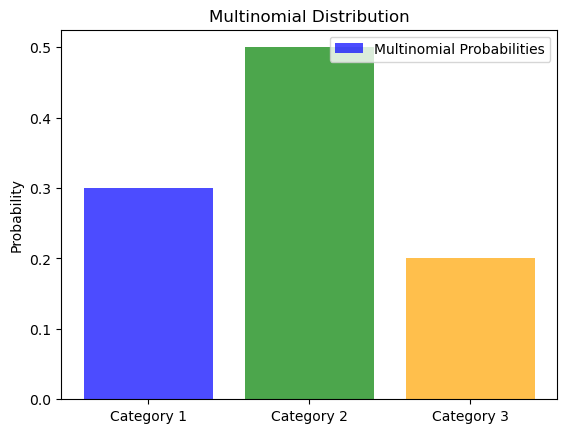

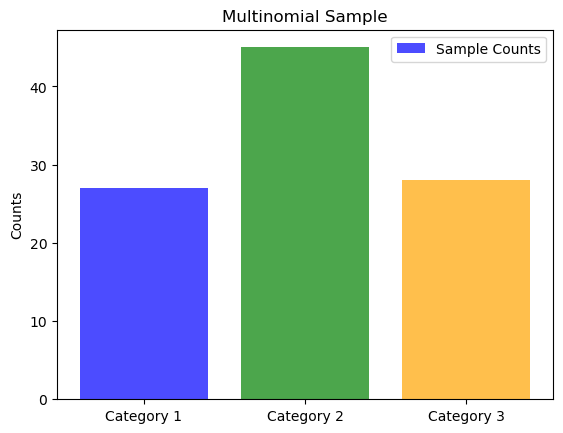

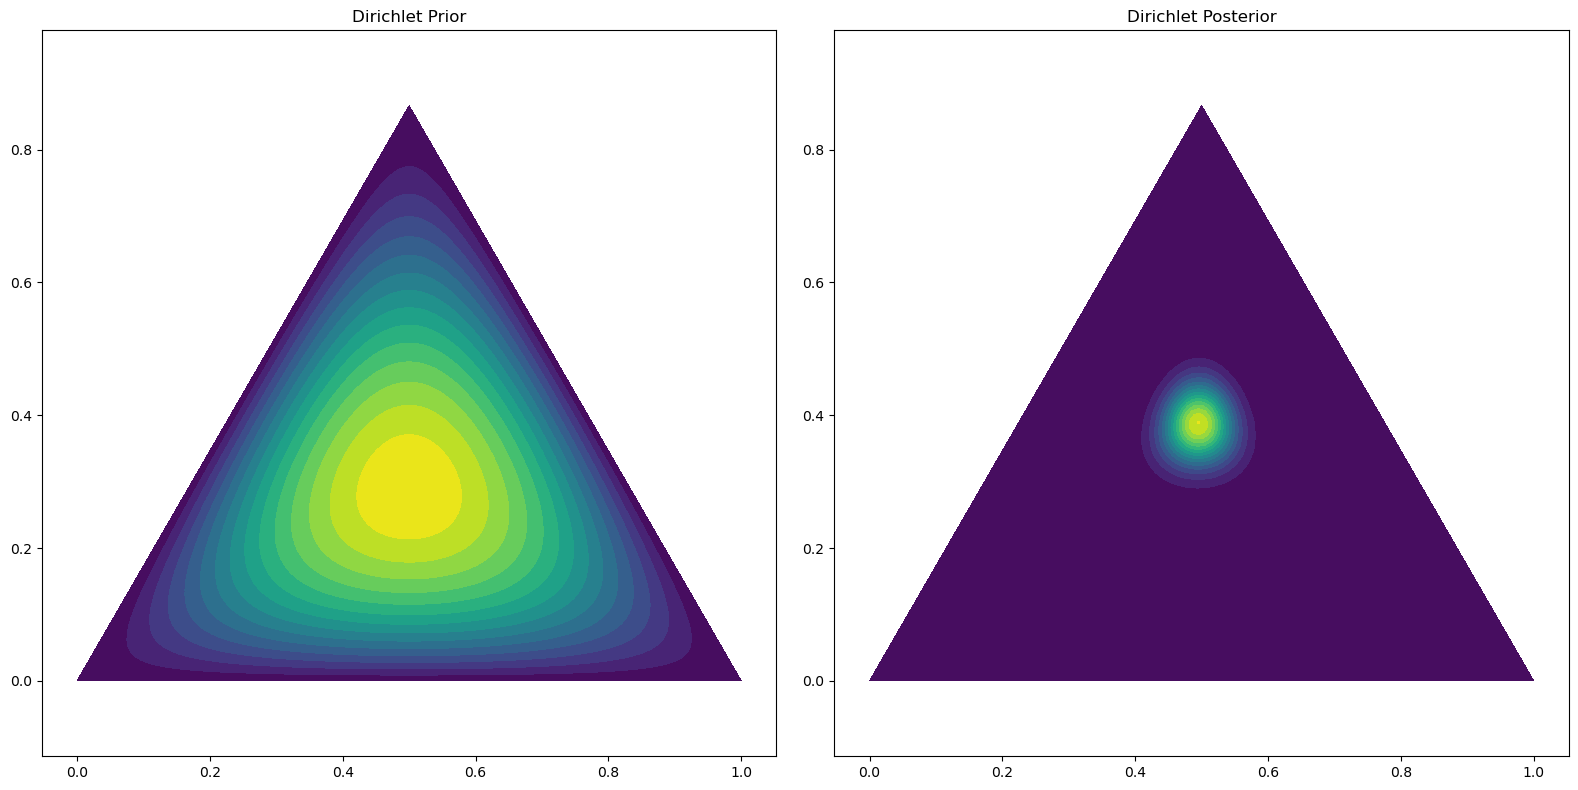

In [3]:
#Q3
import numpy as np
from scipy.stats import multinomial, dirichlet
import matplotlib.pyplot as plt

def ternary_grid(resolution=200):
    points = []
    for i in range(resolution + 1):
        for j in range(resolution + 1 - i):
            k = resolution - i - j
            points.append([i / resolution, j / resolution, k / resolution])
    return np.array(points)

def ternary_to_2d(points):
    x = points[:, 0] + points[:, 1] / 2
    y = np.sqrt(3) / 2 * points[:, 1]
    return x, y

n = 100
p = [0.3, 0.5, 0.2]
sample = multinomial.rvs(n=n, p=p, size=1)[0]
categories = ["Category 1", "Category 2", "Category 3"]


sample = multinomial.rvs(n=n, p=p, size=1)[0]

#visualization of multinomial distribution 
plt.bar(categories, p, color=['blue', 'green', 'orange'], alpha=0.7, label="Multinomial Probabilities")
plt.ylabel("Probability")
plt.title("Multinomial Distribution")
plt.legend()
plt.show()

#visualization of multinomial sample
plt.bar(categories, sample, color=['blue', 'green', 'orange'], alpha=0.7, label="Sample Counts")
plt.ylabel("Counts")
plt.title("Multinomial Sample")
plt.legend()
plt.show()
alpha_prior = np.array([2, 2, 2])
alpha_posterior = alpha_prior + sample

grid = ternary_grid(resolution=100)
x, y = ternary_to_2d(grid)

prior_density = dirichlet.pdf(grid.T, alpha_prior)
posterior_density = dirichlet.pdf(grid.T, alpha_posterior)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
#visualization of Dirichlet distribution of the prior
axs[0].tricontourf(x, y, prior_density, levels=15, cmap='viridis')
axs[0].set_title("Dirichlet Prior")
axs[0].axis("equal")
#visualization of Dirichlet distribution of the posterior
axs[1].tricontourf(x, y, posterior_density, levels=15, cmap='viridis')
axs[1].set_title("Dirichlet Posterior")
axs[1].axis("equal")

plt.tight_layout()
plt.show()
